In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data_gen as gen
import algorithms as alg
import test_interface as tst

%matplotlib inline

## Generating results

In [2]:
k=10
n=200
trials=50

nlist, ndata = tst.load_matrix_nbatch(k=k, trials=trials, resolution=20, e=0.01)
elist, edata = tst.load_matrix_ebatch(k=k, n=n, trials=trials)

Generating data
.................... Done in 1.8151920251722997 minutes.
Generating data
.................... Done in 0.8336822060369694 minutes.


In [3]:
ntests, ntimes, etests, etimes = {}, {}, {}, {}
for algorithm in ('cnt', 'rec_cnt', 'spc', 'rec_spc'):
    ntests[algorithm], ntimes[algorithm] = tst.test_algorithm(algorithm, k, nlist, ndata)
    etests[algorithm], etimes[algorithm] = tst.test_algorithm(algorithm, k, elist, edata)

Testing cnt.................... Done in 0.45100545264628333 minutes.
Testing cnt.................... Done in 0.2883118722464175 minutes.
Testing rec_cnt.................... Done in 3.959708820839891 minutes.
Testing rec_cnt.................... Done in 1.4724555765904142 minutes.
Testing spc.................... Done in 1.0291630255115252 minutes.
Testing spc.................... Done in 0.543423738013818 minutes.
Testing rec_spc.................... Done in 3.0635576271731053 minutes.
Testing rec_spc.................... Done in 1.8438687819868562 minutes.


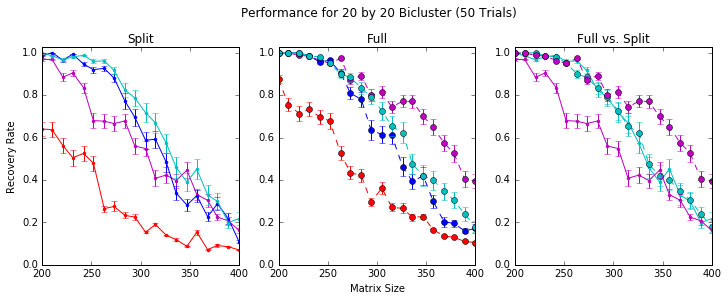

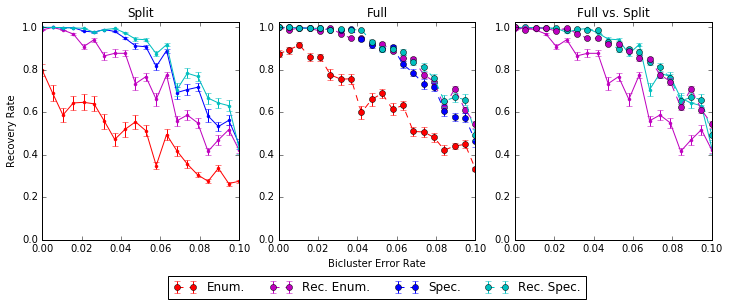

In [4]:
colors = {'cnt':'r', 'rec_cnt':'m', 'spc':'b', 'rec_spc':'c'}
markers = {'split':'.-', 'full':'o--'}
labels = {'cnt':'Enum.', 'rec_cnt':'Rec. Enum.', 'spc':'Spec.', 'rec_spc':'Rec. Spec.'}
SCALE = 0.25

algorithms = ('cnt', 'rec_cnt', 'spc', 'rec_spc')

def get_results(algorithm, mtype, tests, pts):
    perfs = [np.mean(tests[algorithm][n][mtype]) for n in pts]
    errs = [SCALE*np.var(tests[algorithm][n][mtype]) for n in pts]
    return perfs, errs



for param in [(nlist, ntests, 'Matrix Size', False), (elist, etests, 'Bicluster Error Rate', True)]:
    plt.figure(figsize=(12, 4))
    if (not param[3]):
        plt.suptitle('Performance for ' +str(2*k)+' by '+str(2*k)+ ' Bicluster ('+str(trials)+' Trials)',
                     fontsize=12, y=1.02, x=0.515)
    i = 1
    for mtype in ['split', 'full']:
        plt.subplot(130 + i)
        i += 1
        for algorithm in algorithms:
            perfs, errs = get_results(algorithm, mtype, param[1], param[0])
            plt.errorbar(param[0], perfs, errs, label=labels[algorithm], fmt=colors[algorithm] + markers[mtype])
            plt.xlim((min(param[0]), max(param[0])))

        plt.ylim((0, 1.025))
        plt.title(mtype.capitalize())
    
    if (param[3]):
        plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.3))
    # Make cumulative plots.
    plt.subplot(133)
    for algorithm in ['rec_spc', 'rec_cnt']:
        for mtype in ['split', 'full']:
            perfs, errs = get_results(algorithm, mtype, param[1], param[0])
            plt.errorbar(param[0], perfs, errs, fmt=colors[algorithm] + markers[mtype])   
            plt.xlim((min(param[0]), max(param[0])))

    plt.ylim((0, 1.025))
    plt.title('Full vs. Split')
    plt.subplot(131)
    plt.ylabel('Recovery Rate')
    plt.subplot(132)
    plt.xlabel(param[2])
    plt.subplots_adjust(top=0.88)
    plt.show()